# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [4]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
import random
pd.options.mode.chained_assignment = None

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [5]:
DATA_PATH = 'data/'
data= pd.read_csv(DATA_PATH+'data.tsv.gz', compression ='gzip', error_bad_lines=False, sep = '\t')
data.head()

b'Skipping line 2142: expected 11 fields, saw 27\n'


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

### 2.1

In [6]:
#1. drop rows with duplicate id
data=data.drop_duplicates(subset=['id'])
data.head()
print("Number of rows in data: {}" .format(data.shape[0]))

Number of rows in data: 13488


Note that data.shape[0] returns a smaller value than in task1, meaning that the function indeed found some duplicates 
and removed the corresponding rows

### 2.2

In [7]:
#2. 
data.count()

condition               13488
id                      13488
baseline_motorcycle1    13488
update_motorcycle1      13488
baseline_motorcycle2     5648
update_motorcycle2       5648
baseline_motorcycle3     1277
update_motorcycle3       1277
baseline_motorcycle4      326
update_motorcycle4        326
motorcycle_count        13488
dtype: int64

We can see that for each policy the number of values (others that Nan) in baseline contracts is equal to the number of motorcycles in updated contracts for each motorcycle. This let us think that the data is correct and that for each motorcycle recorded in a baseline contract, there is a corresponding updated contract. 

However, with this technique, an error induced by a value existing in the baseline contract and a nan value in the updated contract could be compensated by another error with a nan value in the baseline contract and an existing value in the updated contract. But with four different cases, this is very unlikely to be observed. 
To be sure we will just remove the rows with this error and we should not observe any changes.

In [8]:
indexNames = data[ (((data['baseline_motorcycle2'].isnull())
                        & (data['update_motorcycle2'].notnull()))
                     | ((data['baseline_motorcycle2'].notnull() 
                        & data['update_motorcycle2'].isnull())))
                 & (((data['baseline_motorcycle3'].isnull())
                        & (data['update_motorcycle3'].notnull()))
                     | ((data['baseline_motorcycle3'].notnull() 
                        & data['update_motorcycle3'].isnull())))
                 & (((data['baseline_motorcycle1'].isnull())
                        & (data['update_motorcycle1'].notnull()))
                     | ((data['baseline_motorcycle1'].notnull() 
                        & data['update_motorcycle1'].isnull())))
                 & (((data['baseline_motorcycle4'].isnull())
                        & (data['update_motorcycle4'].notnull()))
                     | ((data['baseline_motorcycle4'].notnull() 
                        & data['update_motorcycle4'].isnull())))].index

data.drop(indexNames , inplace=True)
print("Rows: {}".format(data.shape[0]))

Rows: 13488


As we observe, the data did not change

To check that the number of contracts in the policy matches the motorcycle_count variable, we can count the number of non-null values in each row and divide by 2 to get the number of contracts recorded in a row. Then, we can compare that series to the column of motorcycle counts. As seen below, the two series are equal, so the motorcycle_count column is accurate.

In [9]:
copy = data.drop(['condition', 'id', 'motorcycle_count'], axis=1)
contract_counts = copy.count(axis = 1) / 2
(contract_counts.astype(int)).equals(data['motorcycle_count'])

False

### 2.3

In [10]:
copy=data.drop(['condition', 'id', 'motorcycle_count'], axis=1)
print("means are:\n",copy.mean(), "\n medians are: \n", copy.median())

means are:
 baseline_motorcycle1    7.413998e+14
update_motorcycle1      7.413998e+14
baseline_motorcycle2    6.732597e+04
update_motorcycle2      9.227763e+04
baseline_motorcycle3    6.765732e+04
update_motorcycle3      9.284941e+04
baseline_motorcycle4    6.782798e+04
update_motorcycle4      9.337428e+04
dtype: float64 
 medians are: 
 baseline_motorcycle1    56341.5
update_motorcycle1      82397.5
baseline_motorcycle2    56157.5
update_motorcycle2      82061.0
baseline_motorcycle3    58821.0
update_motorcycle3      85645.0
baseline_motorcycle4    68181.0
update_motorcycle4      93387.5
dtype: float64


Clearly, some of the mean values are not plausible, so there must be outliers in the data.

**Remove outliers**

In [11]:
index_to_change = ['update_motorcycle1','update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4', 
             'baseline_motorcycle1', 'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']

Q1 = data[index_to_change].quantile(0.25)
Q3 = data[index_to_change].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[index_to_change] < (Q1 - 1.5 * IQR)) |(data[index_to_change] > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(13054, 11)

In [12]:
copy=data.drop(['condition', 'id', 'motorcycle_count'], axis=1)
print("means are:\n",copy.mean(), "\n medians are: \n", copy.median())

means are:
 baseline_motorcycle1    62723.617359
update_motorcycle1      87591.231270
baseline_motorcycle2    62343.796951
update_motorcycle2      87234.083116
baseline_motorcycle3    64265.034110
update_motorcycle3      89330.563228
baseline_motorcycle4    65508.520505
update_motorcycle4      91153.488959
dtype: float64 
 medians are: 
 baseline_motorcycle1    54700.0
update_motorcycle1      80428.0
baseline_motorcycle2    54438.5
update_motorcycle2      79838.5
baseline_motorcycle3    58000.0
update_motorcycle3      84348.0
baseline_motorcycle4    64784.0
update_motorcycle4      92453.0
dtype: float64


**Visualize the Distributions**

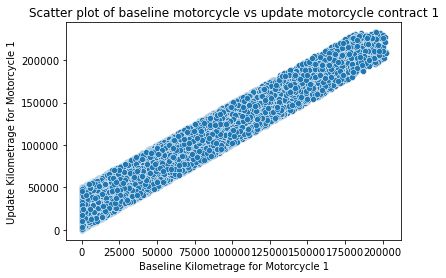

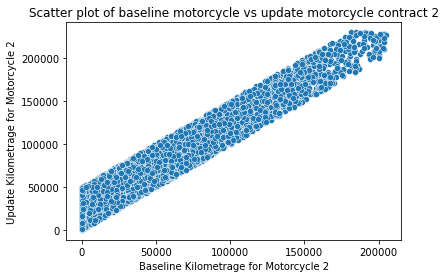

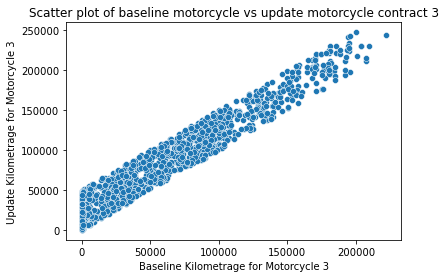

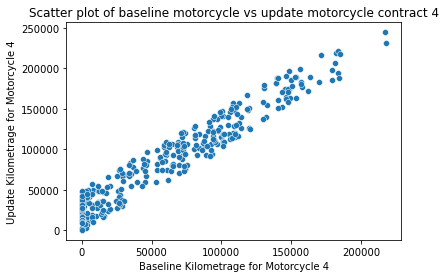

<Figure size 432x288 with 0 Axes>

In [13]:
for i in range(1,5):
    plot=sns.scatterplot(data=data, x="baseline_motorcycle{}".format(i) , y="update_motorcycle{}".format(i)).set(title="Scatter plot of baseline motorcycle vs update motorcycle contract {}".format(i))
    plt.xlabel("Baseline Kilometrage for Motorcycle {}".format(i))
    plt.ylabel("Update Kilometrage for Motorcycle {}".format(i))
    plt.figure()

### 2.4
In the case where we can not remove outliers, it is much better to work with the median as it won't be as affected by outliers as the mean. Indeed, the median is the "middle" value in the list of numbers and won't be shifted as much as the mean by extreme values.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

### 3.1
Create two new columns by taking the mean of baseline and update values across the rows. Then, create a third new column by subtracting them element-wise.

In [14]:
#1.
data['baseline_average'] = data[['baseline_motorcycle1', 'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']].mean(axis=1)
data['update_average'] = data[['update_motorcycle1', 'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']].mean(axis=1)
data['diff_average'] = data['update_average'] - data['baseline_average']
data.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


### 3.2 
Another way of aggregating distinct motorcycles from a single policy...


### 3.3
Create a bar chart of the motorcycle count variable to show the distribution.

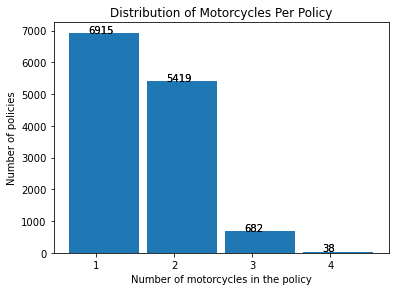

In [15]:
barplot = data['motorcycle_count'].value_counts().tolist()
x_positions = [1,2,3,4]
bar_width = 0.9
 
plt.bar(x_positions, barplot, width = bar_width)
plt.xticks([r + bar_width for r in range(len(x_positions))], ['1', '2', '3', '4'])

label = data['motorcycle_count'].value_counts().tolist()
 
for i in range(len(x_positions)):
    plt.text(x = x_positions[i]-0.2 , y = barplot[i]+0.5, s = label[i], size = 10)
    plt.text(x = x_positions[i]-0.2 , y = barplot[i]+0.5, s = label[i], size = 10)

plt.subplots_adjust(bottom= 0.2, top = 1)
plt.xlabel('Number of motorcycles in the policy')
plt.ylabel('Number of policies')
plt.title('Distribution of Motorcycles Per Policy')
 
plt.show()

### 3.4
Take the mean and standard deviation of the update_average column created in 3.1.

In [16]:
print("Mean of Updated Average Kilometrages: {:.2f}".format(data['update_average'].mean()))
print("Standard Deviation of Updated Average Kilometrages: {:.2f}".format(data['update_average'].std()))

Mean of Updated Average Kilometrages: 87751.72
Standard Deviation of Updated Average Kilometrages: 43932.88


### 3.5
Using loc, filter the rows where the motorcycle count is 4 and then take the mean and standard deviation of all motorcycle update values for those rows.

In [17]:
#5. 
four_moto = data.loc[data['motorcycle_count'] == 4]

u1 = four_moto['update_motorcycle1']
u2 = four_moto['update_motorcycle2']
u3 = four_moto['update_motorcycle3']
u4 = four_moto['update_motorcycle4']

all_updates = pd.concat([u1, u2, u3, u4])

print("Mean of Updated Average Kilometrages for 4 Motorcycle Policies: {:.2f}".format(all_updates.mean()))
print("Standard Deviation of Updated Average Kilometrages for 4 Motorcycle Policies: {:.2f}".format(all_updates.std()))


Mean of Updated Average Kilometrages for 4 Motorcycle Policies: 97989.19
Standard Deviation of Updated Average Kilometrages for 4 Motorcycle Policies: 56366.97


### 3.6 
Discuss..

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

### 4.1

Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) policies where the signing was done at the bottom; 
and b) policies where the signing was done at the top. Additionally, plot the two kilometrage distributions.

In [18]:
#1a)calculation in policies where the signing was done at the bottom in ubdated contracts
data[data.condition=='Sign Bottom'][['update_motorcycle1', 
     'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']].agg(['mean','std'])

,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
mean,93321.013100,93807.015192,95258.78057,97973.770186
std,48901.075556,48277.389770,54747.12258,57298.946616


In [19]:
#1b)calculation in policies where the signing was done at the top in updated contracts
data[data.condition=='Sign Top'][['update_motorcycle1', 
     'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']].agg(['mean','std'])

,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
mean,82059.861036,80929.336248,83480.735537,84114.608974
std,49123.771477,49520.298036,55584.562243,52331.036444


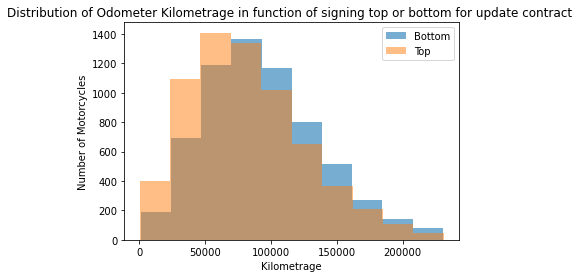

In [20]:
#1 plot

bottom=data[data.condition=='Sign Bottom'][['update_motorcycle1', 
     'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']].mean(axis=1)

top=data[data.condition=='Sign Top'][['update_motorcycle1', 
     'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']].mean(axis=1)

plt.hist(bottom, alpha=0.6, label='Bottom')
plt.hist(top, alpha = 0.5, label='Top')
plt.legend(loc='upper right')
plt.xlabel('Kilometrage')
plt.ylabel('Number of Motorcycles')
plt.title('Distribution of Odometer Kilometrage in function of signing top or bottom for update contract ')
plt.show()

### 4.2

In [21]:
#2
stats.ttest_ind(bottom.dropna(), top.dropna())

Ttest_indResult(statistic=15.456057062395457, pvalue=2.0405349629928552e-53)

p is less than 0.05 -> we reject the null hypothesis that the two distributions are not significantly different -> there is a significant difference

### 4.3
As we have seen with the t-test, there is a significant difference between the two distributions and we can see on the graph that the people who signed on the top have declared less kilometers in average than when signing at the bottom. This is surprising as we would expect the opposite as signing top should enhance honesty.

### 4.4
We should not expect a significant difference between the two groups as the condition 'sign top' or 'sign bottom' were not applied yet and the groups were done randomly. Therefore the distribution of the two groups should be similar.


### 4.5

In [22]:
#5a) calculation in policies where the signing was done at the bottom in baseline contracts
data[data.condition=='Sign Bottom'][['baseline_motorcycle1', 
     'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']].agg(['mean','std'])

,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4
mean,69764.877261,69681.784656,70360.539363,74353.869565
std,46842.048613,46142.680504,52223.077344,54905.283862


In [23]:
#5b) calculation in policies where the signing was done at the top in baseline contracts
data[data.condition=='Sign Top'][['baseline_motorcycle1', 
     'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']].agg(['mean','std'])

,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4
mean,55926.183077,55305.209836,58250.130579,56379.666667
std,46823.862717,47333.642653,53227.920160,50350.157280


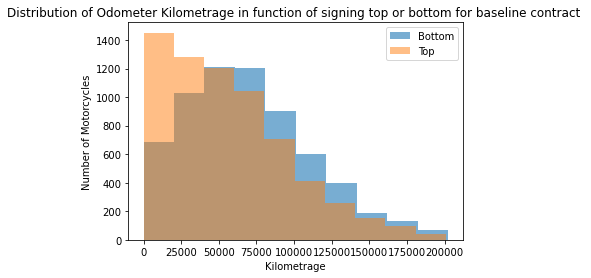

In [24]:
bottom_=data[data.condition=='Sign Bottom'][['baseline_motorcycle1', 
     'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']].mean(axis=1)

top_=data[data.condition=='Sign Top'][['baseline_motorcycle1', 
     'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']].mean(axis=1)

plt.hist(bottom_, alpha=0.6, label='Bottom')
plt.hist(top_, alpha = 0.5, label='Top')
plt.legend(loc='upper right')
plt.xlabel('Kilometrage')
plt.ylabel('Number of Motorcycles')
plt.title('Distribution of Odometer Kilometrage in function of signing top or bottom for baseline contract ')
plt.show()

### 4.6

In [25]:
#6
stats.ttest_ind(bottom_.dropna(), top_.dropna())

Ttest_indResult(statistic=19.43256795784435, pvalue=6.0551385729255415e-83)

As we can see, the p value is much smaller than 0.5, therefore we reject the null hypothesis which means that the two distributions are significantly different. This result is surprising as there is no logical reason for a difference for the baseline contract which was made before any assignment to a group.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

### 5.1
Take the baseline data for contract 1 and the update data for contract 1 and plot them on the same figure to see the distribution for each.

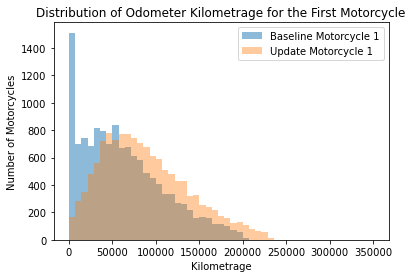

In [26]:
bins = np.linspace(-0.1, 350000, 50)

plt.hist(data['baseline_motorcycle1'], bins, alpha=0.5, label='Baseline Motorcycle 1')
plt.hist(data['update_motorcycle1'], bins, alpha = 0.4, label='Update Motorcycle 1')
plt.legend(loc='upper right')
plt.xlabel('Kilometrage')
plt.ylabel('Number of Motorcycles')
plt.title('Distribution of Odometer Kilometrage for the First Motorcycle')
plt.show()

### 5.2
Get the difference between the update and baseline values for contract 1 and plot the distribution of those differences.

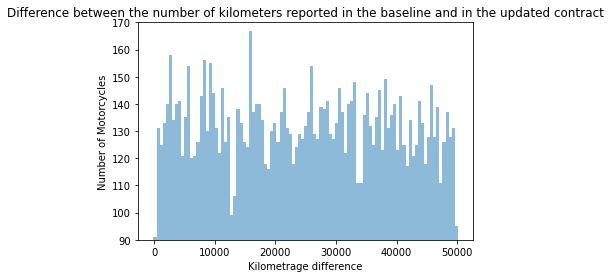

In [25]:
diff = data['update_motorcycle1']-data['baseline_motorcycle1']

bins = np.linspace(diff.min()-100, diff.max()+100, 100)
plt.hist(diff, bins, alpha=0.5)
plt.ylim([90,170])
plt.xlabel('Kilometrage difference')
plt.ylabel('Number of Motorcycles')
plt.title('Difference between the number of kilometers reported in the baseline and in the updated contract')
plt.show()

### 5.3

These data are unlikely to have originated from real odometer readings because, by looking at the plot of the differences in kilometrage, 
for a range of wide values (from 0 to 50000 km approximatively) we have an almost constant number of motorcycles. 
For example, it is surprising that we have approximatively the same number of motorcycles with a difference of 0 km between the baseline
and the update contract than for a difference of 50 000 km.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

### 6.1
Here we can visualize the last digits of the baseline contracts and see that most of the values fall in bins exactly on the multiples of 100. The zero bin has so many occurrences because it includes all values that are multiples of one thousand as well.

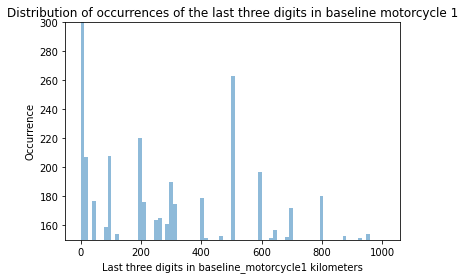

In [26]:
data['LastDigit_baseline']=data['baseline_motorcycle1'].mod(10**3)
data['LastDigit_update']=data['update_motorcycle1'].mod(10**3)

plt.hist(data['LastDigit_baseline'], np.linspace(0, data['LastDigit_baseline'].max()+10, 80), alpha=0.5)
plt.ylim([150,300])
plt.xlabel('Last three digits in baseline_motorcycle1 kilometers')
plt.ylabel('Occurrence')
plt.title('Distribution of occurrences of the last three digits in baseline motorcycle 1')
plt.show()

The value counts of the last baseline digits confirm what we see in the above plot.

In [27]:
data['LastDigit_baseline'].value_counts()

0      1349
500     138
200      72
600      64
800      54
       ... 
434       4
476       3
947       3
498       3
329       2
Name: LastDigit_baseline, Length: 1000, dtype: int64

Here we visualize the last three digits of the update values.

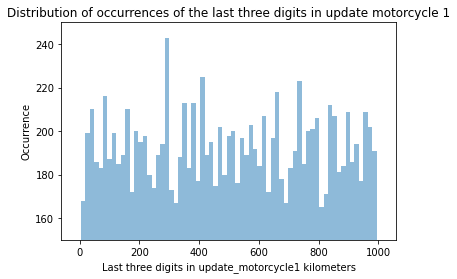

In [28]:
plt.hist(data['LastDigit_update'], 
         np.linspace(data['LastDigit_update'].min()-10, data['LastDigit_update'].max()+10, 70), alpha=0.5)
plt.ylim([150,250])
plt.xlabel('Last three digits in update_motorcycle1 kilometers')
plt.ylabel('Occurrence')
plt.title('Distribution of occurrences of the last three digits in update motorcycle 1')
plt.show()

The following digits appear to be much more random.

In [29]:
data['LastDigit_update'].value_counts()

738    25
60     25
980    23
902    23
378    23
       ..
523     4
777     4
818     4
59      3
207     3
Name: LastDigit_update, Length: 1000, dtype: int64

### 6.2
The distribution of the baseline values is not evenly distributed at all. Most of the values are rounded to the nearest hundred or thousand, so the last three digits are 000, 500, 200, 300, 800, etc. On the other hand, the distribution of the update values is much more random. There is no visible pattern and the numbers are not rounded. 

### 6.3
The pattern seen in the baseline values could be due to the fact that motorcycle owners rounded their kilometrage values when reporting. Since the numbers are in the ten thousands, it makes sense that they would round the values. They might not have had an exact value on hand or they did not feel that it was necessary to give an exact value. However, in the data description it also says that customers had to report exact kilometrage, so it is strange that so many end with 00.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

### 7.1

In [30]:
#Load the data:
fonts=pd.read_csv(DATA_PATH+'fonts.csv')
data=data.drop(['LastDigit_baseline', 'LastDigit_update'], 1)
merge = pd.merge(fonts,data)

/tmp/ipykernel_57/2828654666.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop(['LastDigit_baseline', 'LastDigit_update'], 1)


In [31]:
merge.head()

,id,font,condition,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,1,Helvetica,Sign Top,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,2,Helvetica,Sign Bottom,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,3,Helvetica,Sign Bottom,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,4,Helvetica,Sign Bottom,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,5,Arial,Sign Bottom,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


### 7.2

In [32]:
merge['font'].value_counts()

Helvetica    6529
Arial        6525
Name: font, dtype: int64

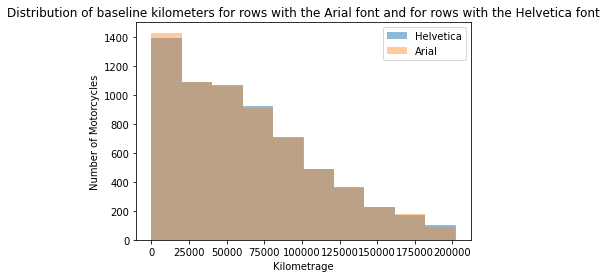

In [33]:
plt.hist(merge[merge.font=='Helvetica']['baseline_motorcycle1'], alpha=0.5, label='Helvetica')
plt.hist(merge[merge.font=='Arial']['baseline_motorcycle1'], alpha = 0.4, label='Arial')
plt.legend(loc='upper right')
plt.xlabel('Kilometrage')
plt.ylabel('Number of Motorcycles')
plt.title('Distribution of baseline kilometers for rows with the Arial font and for rows with the Helvetica font')
plt.show()

### 7.3

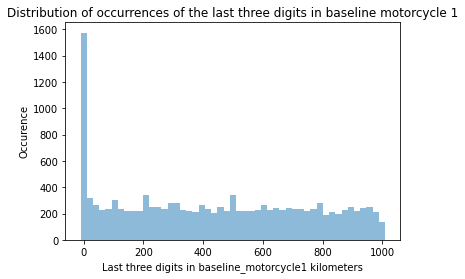

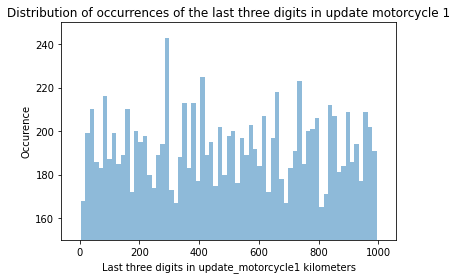

In [34]:
merge['LastDigit_baseline']=merge['baseline_motorcycle1'].mod(10**3)
merge['LastDigit_update']=merge['update_motorcycle1'].mod(10**3)

plt.hist(merge['LastDigit_baseline'], np.linspace(merge['LastDigit_baseline'].min()-10, merge['LastDigit_baseline'].max()+10, 50), alpha=0.5)
plt.xlabel('Last three digits in baseline_motorcycle1 kilometers')
plt.ylabel('Occurence')
plt.title('Distribution of occurrences of the last three digits in baseline motorcycle 1')
plt.show()

plt.hist(merge['LastDigit_update'], 
         np.linspace(merge['LastDigit_update'].min()-10, merge['LastDigit_update'].max()+10, 70), alpha=0.5)
plt.ylim([150,250])
plt.xlabel('Last three digits in update_motorcycle1 kilometers')
plt.ylabel('Occurence')
plt.title('Distribution of occurrences of the last three digits in update motorcycle 1')
plt.show()

The following two plots show the distribution of occurrences of the last three digits for baseline and update contract 1 depending on the font.

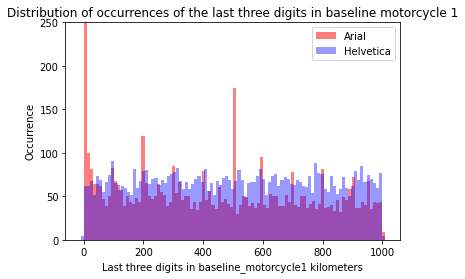

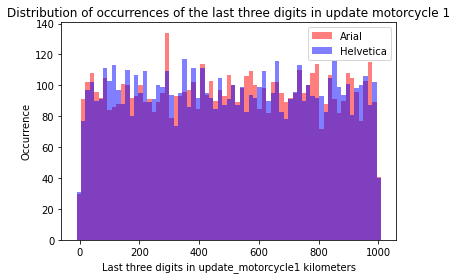

In [35]:
arial = merge.loc[merge.font == 'Arial']
helvetica = merge.loc[merge.font == 'Helvetica']
                

arial['LastDigit_baseline']=arial['baseline_motorcycle1'].mod(10**3)
arial['LastDigit_update']=arial['update_motorcycle1'].mod(10**3)

helvetica['LastDigit_baseline']=helvetica['baseline_motorcycle1'].mod(10**3)
helvetica['LastDigit_update']=helvetica['update_motorcycle1'].mod(10**3)


plt.hist(arial['LastDigit_baseline'], np.linspace(0, arial['LastDigit_baseline'].max()+10, 100), alpha=0.5, color = 'red', label = "Arial")
plt.hist(helvetica['LastDigit_baseline'], np.linspace(helvetica['LastDigit_baseline'].min()-10, helvetica['LastDigit_baseline'].max()+10, 100), alpha=0.4, color = 'blue', label = "Helvetica")
plt.xlabel('Last three digits in baseline_motorcycle1 kilometers')
plt.ylabel('Occurrence')
plt.ylim([0,250])
plt.title('Distribution of occurrences of the last three digits in baseline motorcycle 1')
plt.legend(loc='upper right')
plt.show()

plt.hist(arial['LastDigit_update'], 
         np.linspace(arial['LastDigit_update'].min()-10, arial['LastDigit_update'].max()+10, 70), alpha=0.5, color = 'red', label = "Arial")
plt.hist(helvetica['LastDigit_update'], 
         np.linspace(helvetica['LastDigit_update'].min()-10, helvetica['LastDigit_update'].max()+10, 70), alpha=0.5, color = 'blue', label = "Helvetica")
plt.xlabel('Last three digits in update_motorcycle1 kilometers')
plt.ylabel('Occurrence')
plt.title('Distribution of occurrences of the last three digits in update motorcycle 1')
plt.legend(loc='upper right')
plt.show()


### 7.4
From the above plots, we can see that the rounded baseline values come from the Arial rows. The Arial distribution clearly has peaks at each multiple of 100, most noticeably at 0. The 0 bin includes all values that end in 000, so a huge proportion of the Arial data are multiples of one thousand. The Helvetica rows do not have peaks at 000, 100, 200, 300, etc. This suggests that the Helvetica rows might not be authentic data. Also, in Task 7.2, we see that the distributions are almost identical which is suspicious. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

- Our analyses have provided significant evidence that the data has been tampered with. To begin with, we would expect that the average update value for people signing at the the top would be greater than for people signing at the bottom, but it turned out that it was less. In Task 5.2, we see that the difference in odometer readings is relatively constant over values between 0 and 50,000. This shape of distribution is strange because you would most likely expect a bell-shaped distribution, with small amounts of people driving extreme distances and the majority somewhere in the middle. Secondly, looking at the last three digits of the kilometrage values, we see that in the baseline contract, a vast majority of the values are rounded. However, this is not the case with the updated values, which appear to have a random last three digits.  

- Based on the analyses that we performed, our hypothesis about the method of data tampering is that somebody took the original dataset of about 6500 rows, copied it, and then made some small changes. The person may have added some small amount to the original data because if you look at the baseline values for each font, the Helvetica font data has no zeros, whereas a significant chunk of the Arial baseline values are zero. This is demonstrated in the code cells below. This suggests that the person took the original data and added some amount to every value, resulting in no contracts beginning with zero. 

- The data does not provide any evidence that signing at the top decreases dishonesty. In fact, the tests in Task 4 showed the opposite to be true. However, due to the unsure integrity of this data, we cannot draw any definite conclusions about the honesty of motorcycle owners.


The following two code cells show that the fabricated Helvetica baseline values for motorcycle 1 contain no zeros at all, but the Arial baseline values have over one hundred policies that begin with 0 km.

In [36]:
merge[merge.font=='Helvetica']['baseline_motorcycle1'].sort_values().head(100)

6187       6
12691     15
7450      16
6737      20
11161     23
        ... 
6501     294
11414    299
3078     304
7809     307
6220     307
Name: baseline_motorcycle1, Length: 100, dtype: uint64

In [37]:
merge[merge.font=='Arial']['baseline_motorcycle1'].sort_values().head(120)

496      0
6426     0
7582     0
6010     0
2511     0
        ..
4491     0
2735     0
10400    1
7014     1
2756     1
Name: baseline_motorcycle1, Length: 120, dtype: uint64